In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv("Salary_Data.csv")

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.shape

(6704, 6)

In [5]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [8]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


#### Split features and targets

In [10]:
x=df.drop("Salary",axis=1)
y=df['Salary']

#### Identify Categorical and Numerical columns

In [11]:
cat_col=['Gender','Education Level','Job Title']
num_col=['Salary','Age','Years of Experience']

#### Encoding Categorical columns

In [14]:
preprocess=ColumnTransformer(transformers=[("cat",OneHotEncoder(handle_unknown="ignore"),cat_col)],remainder='passthrough')
x_encoded=preprocess.fit_transform(x)

#### Train-Test-Split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,test_size=0.2,random_state=42)

#### Model Training

In [19]:
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Predictions

In [22]:
y_pred=model.predict(x_test)
y_pred

array([126451.2728828 ,  89003.58239296, 109834.06387925, ...,
       103050.56373078,  56324.23513001,  62228.57293252], shape=(1340,))

#### Evaluation

In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


📊 Model Evaluation:
Mean Squared Error (MSE): 357627819.9452934
R² Score: 0.8745807711871086


#### Visualizations

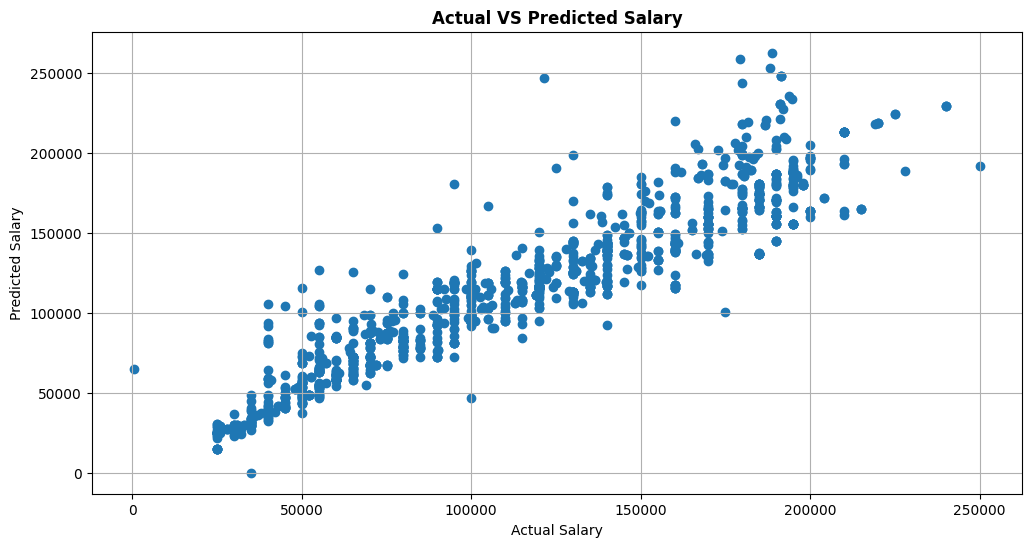

In [28]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred)
plt.title("Actual VS Predicted Salary",fontweight='bold')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.grid()
plt.show()

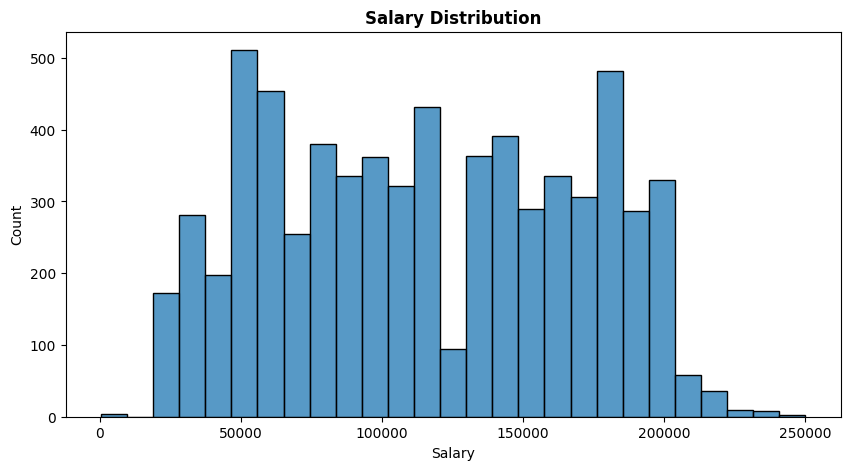

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(df['Salary'])
plt.title("Salary Distribution",fontweight='bold')
plt.show()